In [27]:
import pandas as pd
import numpy as np
import cv2
import tifffile as tiff



# global varuables
w = h = 9

data = {'class' : ['veg', 'built', 'wat']}
dt = pd.DataFrame(data)

#
# Reads band images and index images
#
def read_img():
    data = []

    for i in range(1, 8):
        filename = "input/Landsat8-A/B" + str(i) + "_250.tif"
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        data.append(img)

    index = ["NDVI.tif", "NDWI.tif", "NDBI.tif"]
    for i in index:
        filename = "input/Landsat8-A/" + i
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        data.append(img)

#     cv2.imshow("Image", data[9])
#     cv2.waitKey(0)
    
    return data

#
# Crop and Compute
#
def crop_calc(_img, _pts):
    median = []
    std = []

    # iterate over rows with iterrows()
    for index, row in _pts.iterrows():
        # print(index, row['X'], row['Y'])
        
        x = row['X']
        y = row['Y']
        
        #for i, img in enumerate(_img):
        crop_img = _img[y:y+h, x:x+w]
        # cv2.imwrite('output/' + 'water_' +str(i+1) + '.tif', crop_img)
        median.append(np.median(crop_img))
        std.append(np.std(crop_img))
        #break;
            
    return [median, std]

In [3]:

v_pts = pd.read_excel('input/points.xlsx', sheet_name = 'Vegetation')
b_pts = pd.read_excel('input/points.xlsx', sheet_name = 'Built-up')
w_pts = pd.read_excel('input/points.xlsx', sheet_name = 'Water')


In [4]:
def box_plot(_stat, _img, _bndIdx):
    
    filename = 'output/veg_med_std_'
    if(_bndIdx.isdigit()):
        filename += 'b' + _bndIdx
    else:
        filename += _bndIdx
    filename += '.xlsx'        
    
    v_res = crop_calc(_img, v_pts)
    b_res = crop_calc(_img, b_pts)
    w_res = crop_calc(_img, w_pts)
    
    '''
    pd.DataFrame(v_res).to_excel(filename)
    pd.DataFrame(b_res).to_excel(filename)
    pd.DataFrame(w_res).to_excel(filename)
    '''
    
    # median = 0, std = 1
    folder =  "median/" if _stat == 0 else "std/"
    _v = v_res[_stat]
    _b = b_res[_stat]
    _w = w_res[_stat]

    res = [_v, _b, _w]
    res = pd.DataFrame(res)
    result = res.T
    # print(result.head())

    result = result.values.tolist()
    
    title = "median " if _stat == 0 else "std "
    title += str(h) + "x" + str(w) + " "
    title += "band " + _bndIdx if _bndIdx.isdigit() else _bndIdx 

    df = pd.DataFrame(result, columns=['Veg', 'Built', 'Water'])
    boxplot = df.boxplot(column=['Veg', 'Built', 'Water'])

    fig = boxplot.get_figure()
    fig.suptitle(title)
    
    bmin = "b" + _bndIdx if _bndIdx.isdigit() else _bndIdx
    bmin += '_min';
    
    bmax = "b" + _bndIdx if _bndIdx.isdigit() else _bndIdx
    bmax += '_max';
    
    min_max = { bmin : [df['Veg'].quantile(.25), df['Built'].quantile(.25), df['Water'].quantile(.25)],
                bmax : [df['Veg'].quantile(.75), df['Built'].quantile(.75), df['Water'].quantile(.75)] }
    
    dt2 = pd.DataFrame(min_max)
    return dt2
    
#     fig.show()
#     fig.savefig('output/' + folder + title + '.png')


In [5]:
i_img = read_img()

# for i in range(1, 8):
#     print('# median  band ' + str(i))
#     print('box_plot(0, i_img[' + str(i-1) + '], "' + str(i) + '")')

In [95]:
# dt = pd.concat([dt, dt2], axis = 1)

# ndata = {'b2_min' : [1, 2, 2], 'b_2max' : [3,4,5]}
# dt2 = pd.DataFrame(ndata)

# dt = pd.concat([dt, dt2], axis = 1)

# print(dt)

   class  b2_min  b_2max
0    veg       1       3
1  built       2       4
2    wat       2       5


# MEDIAN

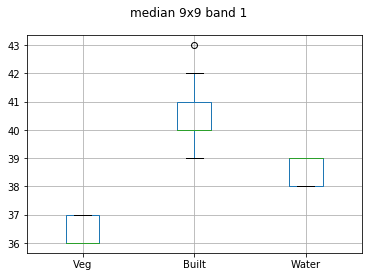

In [28]:
# median  band 1
dt2 = box_plot(0, i_img[0], "1")


In [29]:
dt = pd.concat([dt, dt2], axis = 1)
dt

,class,b1_max,b1_min
0,veg,37.0,36.0
1,built,41.0,40.0
2,wat,39.0,38.0


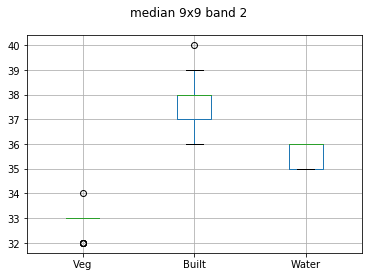

In [30]:
# median  band 2
dt2 = box_plot(0, i_img[1], "2")
dt = pd.concat([dt, dt2], axis = 1)

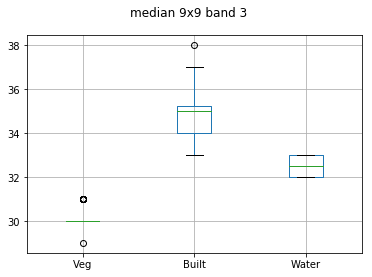

In [31]:
# median  band 3
dt2 = box_plot(0, i_img[2], "3")
dt = pd.concat([dt, dt2], axis = 1)

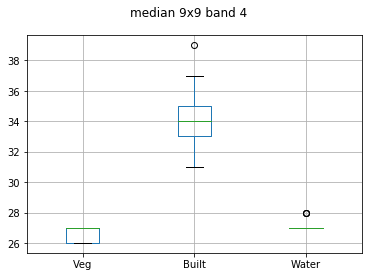

In [32]:
# median  band 4
dt2 = box_plot(0, i_img[3], "4")
dt = pd.concat([dt, dt2], axis = 1)

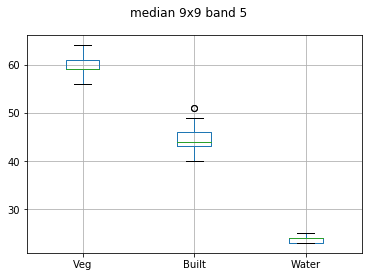

In [33]:
# median  band 5
dt2 = box_plot(0, i_img[4], "5")
dt = pd.concat([dt, dt2], axis = 1)

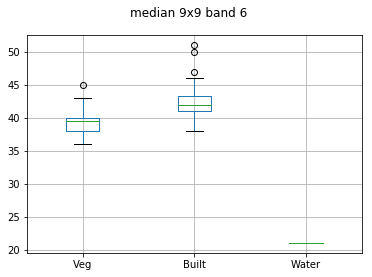

In [34]:
# median  band 6
dt2 = box_plot(0, i_img[5], "6")
dt = pd.concat([dt, dt2], axis = 1)

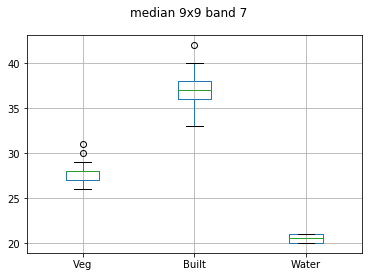

In [35]:
# median  band 7
dt2 = box_plot(0, i_img[6], "7")
dt = pd.concat([dt, dt2], axis = 1)

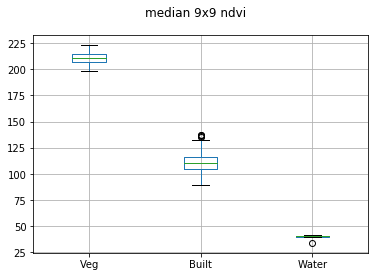

In [36]:
# median  ndvi
dt2 = box_plot(0, i_img[7], "ndvi")
dt = pd.concat([dt, dt2], axis = 1)

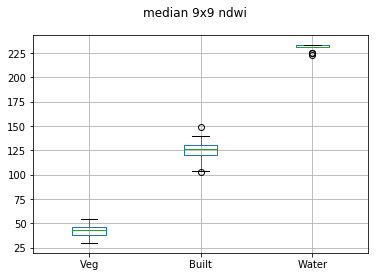

In [37]:
# median  ndwi
dt2 = box_plot(0, i_img[8], "ndwi")
dt = pd.concat([dt, dt2], axis = 1)

In [39]:
# for i in range(1, 8):
#     print('# std  band ' + str(i))
#     print('box_plot(1, i_img[' + str(i-1) + '], "' + str(i) + '")')

dt

,class,b1_max,b1_min,b2_max,b2_min,b3_max,b3_min,b4_max,b4_min,b5_max,...,b6_max,b6_min,b7_max,b7_min,ndvi_max,ndvi_min,ndwi_max,ndwi_min,ndbi_max,ndbi_min
0,veg,37.0,36.0,33.0,33.0,30.00,30.0,27.0,26.0,61.0,...,40.00,38.0,28.0,27.0,215.0,207.0,46.0,38.0,76.5,69.75
1,built,41.0,40.0,38.0,37.0,35.25,34.0,35.0,33.0,46.0,...,43.25,41.0,38.0,36.0,116.0,105.0,131.0,120.0,170.0,153.75
2,wat,39.0,38.0,36.0,35.0,33.00,32.0,27.0,27.0,24.0,...,21.00,21.0,21.0,20.0,41.0,40.0,233.0,231.0,138.0,138.00


# Standard Deviation

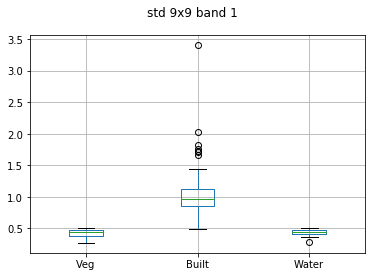

In [16]:
# std  band 1
box_plot(1, i_img[0], "1")

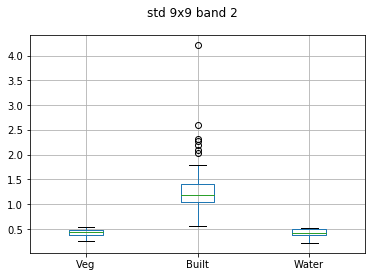

In [17]:
# std  band 2
box_plot(1, i_img[1], "2")

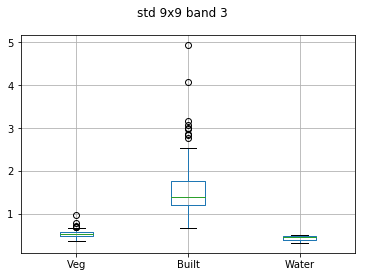

In [18]:
# std  band 3
box_plot(1, i_img[2], "3")

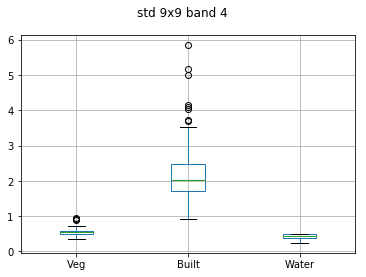

In [19]:
# std  band 4
box_plot(1, i_img[3], "4")

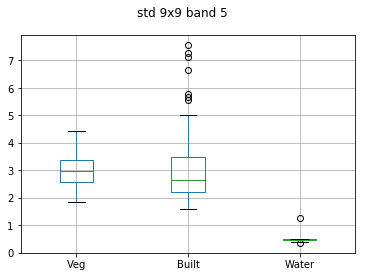

In [20]:
# std  band 5
box_plot(1, i_img[4], "5")

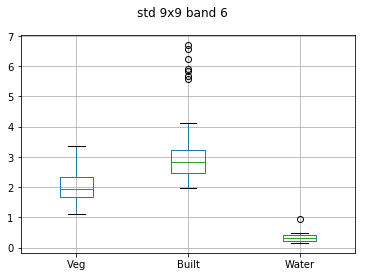

In [21]:
# std  band 6
box_plot(1, i_img[5], "6")

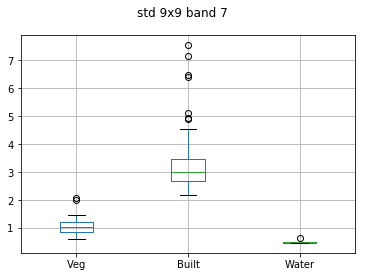

In [22]:
# std  band 7
box_plot(1, i_img[6], "7")

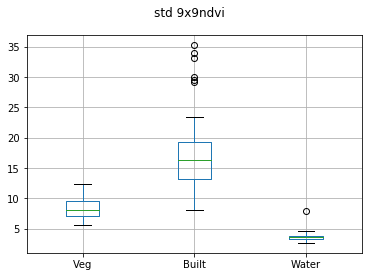

In [23]:
# std  ndvi
box_plot(1, i_img[7], "ndvi")

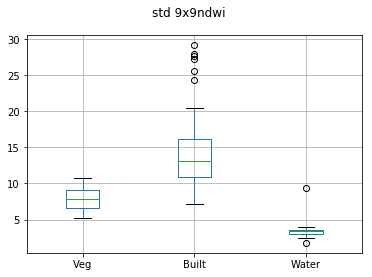

In [24]:
# std  ndwi
box_plot(1, i_img[8], "ndwi")

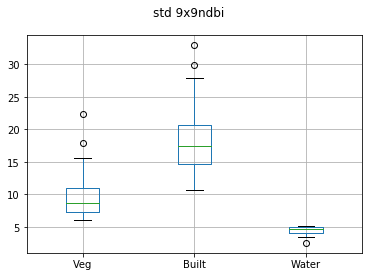

In [25]:
# std  ndbi
box_plot(1, i_img[9], "ndbi")